# EDA Part 2 & Functions

<img src='graphics/automation.jpg' width = 600>

In the last meet-up, we introduced Exploratory Data Analysis (EDA). The importance of this step (examining, cleaning and questioning) cannot be understated. Thus, we will spend the first part of this meet-up working in teams to conduct our own EDA on a new set of data.

A data scientist’s workflow can be broken down into six components:
1. Define the problem (covered two sections from here)
1. Gather the data (done for you)
1. Explore the data (our focus for today)
1. Model with the data
1. Evaluate the model
1. Answer the problem

This workflow is not a linear process. It involves (in many cases) multiple back and forths between all the different parts of the process.

## The Dataset
The dataset 'India air quality data' is from the Kaggle challenge ["India Air Quality Data"](https://www.kaggle.com/shrutibhargava94/india-air-quality-data). The dataset is located in the data folder. 

The dataset consists of the following columns:

- stn_code
- sampling_date
- state *State*
- location *City*
- agency
- type *Area category*
- so2 *Sulphur dioxde*
- no2 *Nitrogen dioxide*
- rspm *Respirable Suspended Particulate Matter*
- spm *Suspended Particulate Matter*
- location_monitoring_station *location of monitoring area*
- pm2_5 *PSI 2.5*
- date *Date of recording*

## Our Analysis Question
As with any project, we need to know what is the question we are trying to answer. In this challenge, we want to know the air quality of India (which is actually worse than China's, but we want to learn how bad is the air quality.) 


The goals of this challenge are to  
1. Clean the dataset to address the project question
1. Establish visualizations of the data

I will not tell you more about the dataset, so that this is truly an EDA for you.

## Exercise 1: Load the necessary libraries and dataset

You need to load the necessary libraries in order to 
1. Read the data into a DataFrame
1. Plot the data in both Matplotlib and Seaborn

In [10]:
# Write your code here to load the libraries and load the dataset.

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('fivethirtyeight')

import seaborn as sns
sns.set(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

df = pd.read_csv('data/data.csv')


# Exercise 2: Initial Data Examination

There are six fundamental things we look at initially. In the next block, write the code to print out each of these six fundamental examinations, placing a title to each on a separate line from the actual data. 

In [11]:
# Write your code here

print('DataFrame Shape:\n', df.shape, '\n\n')
display('DataFrame Head:', df.head())
print('\n\nDataFrame Statistical Description:\n', df.describe(), '\n\n')
print('DataFrame Column Types:\n', df.dtypes,'\n\n')
print('\nDataFrame count: ', '\n', df.count())
print('\n\nDataFrame Null Value Count:\n', df.isnull().sum())
print('\n\nNumber of Duplicated Rows:\n', df.duplicated().sum())

DataFrame Shape:
 (435742, 13) 




'DataFrame Head:'

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/90
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/90
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/90
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/90
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/90




DataFrame Statistical Description:
                  so2            no2           rspm            spm        pm2_5
count  401096.000000  419509.000000  395520.000000  198355.000000  9314.000000
mean       10.829414      25.809623     108.832784     220.783480    40.791467
std        11.177187      18.503086      74.872430     151.395457    30.832525
min         0.000000       0.000000       0.000000       0.000000     3.000000
25%         5.000000      14.000000      56.000000     111.000000    24.000000
50%         8.000000      22.000000      90.000000     187.000000    32.000000
75%        13.700000      32.200000     142.000000     296.000000    46.000000
max       909.000000     876.000000    6307.033333    3380.000000   504.000000 


DataFrame Column Types:
 stn_code                        object
sampling_date                   object
state                           object
location                        object
agency                          object
type                        

# A Bit of Cleaning

Now that we have a sense of the data, let's begin cleaning the data.

## Exercise 3: Dropping some unnecessary columns
There are a few columns which we just don't need because they won't add to our eventual analysis. 
- stn_code
- agency
- sampling_date
- location_monitoring_station 

In the next block, write the code to **drop** these columns. As a team, you will want to do a bit of investigation into `.drop( )` as it relates to columns. You can drop all of the columns that you want to drop in one line of code. 

In [12]:
# Write your code here

df = df.drop(columns=['stn_code', 'agency', 'sampling_date', 'location_monitoring_station'])

df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,2/1/90
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,2/1/90
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,2/1/90
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,3/1/90
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,3/1/90


## Exercise 4: Are the text entries correct?

Digging deeper on our remaining columns, we notice that state, location and type are text entries. But do we know if there are misspellings? We don't until we look at them. 

In the next block, write a loop that prints out the **unique** values for each of text columns. Make sure that we write the code to make it easy for a human to read the output. This means printing the name of the column, followed by a colon, and on the next line print out the unique values. As a team, you will want to look at the `.unique( )` command again. 

In [13]:
# Write your code here. 

text_columns = ['state', 'location', 'type']

for column_name in text_columns:
    print(column_name+':\n', df[column_name].unique(),'\n\n')

state:
 ['Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh'
 'Chhattisgarh' 'Dadra & Nagar Haveli' 'Daman & Diu' 'Delhi' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand'
 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya'
 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim'
 'Tamil Nadu' 'Telangana' 'Uttar Pradesh' 'Uttarakhand' 'Uttaranchal'
 'West Bengal' 'andaman-and-nicobar-islands' 'Lakshadweep' 'Tripura'] 


location:
 ['Hyderabad' 'Vishakhapatnam' 'Visakhapatnam' 'Tirupati' 'Vijayawada'
 'Patancheru' 'Ramagundam' 'Kurnool' 'Guntur' 'Nalgonda' 'Nellore'
 'Warangal' 'Chittoor' 'Khammam' 'Kakinada' 'Ananthapur' 'Eluru' 'Kadapa'
 'Karimnagar' 'Nizamabad' 'Ongole' 'Rajahmundry' 'Sangareddy' 'Srikakulam'
 'Vizianagaram' 'Itanagar' 'Naharlagun' 'Guwahati' 'Bongaigaon'
 'Dibrugarh' 'Golaghat' 'Hailakandi' 'Sibsagar' 'Tezpur' 'Silchar'
 'Daranga' 'Lakhimpur' 'Nagaon' 'Nalbari' 'Sivasagar' 'Silcher' 'Tin

### Bonus Exercise
You may have listed out the object columns in the last exercise - after all, there are only four of them. But what are you going to do if there are 400 of them? 

In the next block, write the code to check the `.dtype` of each column. If the column is an object, add that column to a list of the text column names, then print out the list.

In [14]:
# Write your code here

text_columns = []

for key in df.keys():
    if df[key].dtype == 'object':
        text_columns.append(key)
        
print(text_columns)

['state', 'location', 'type', 'date']


Now rewrite your code that looks at **unique** values within each text column. This new code will reflect the code in the block above. 

In [15]:
# Write your code here

text_columns = []

for key in df.keys():
    if df[key].dtype == 'object':
        text_columns.append(key)

for column_name in text_columns:
    print(column_name+':\n', df[column_name].unique(),'\n\n')
    
# OR

for key in df.keys():
    if df[key].dtype == 'object':
        print(key+':\n', df[key].unique(),'\n\n')

state:
 ['Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh'
 'Chhattisgarh' 'Dadra & Nagar Haveli' 'Daman & Diu' 'Delhi' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand'
 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya'
 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim'
 'Tamil Nadu' 'Telangana' 'Uttar Pradesh' 'Uttarakhand' 'Uttaranchal'
 'West Bengal' 'andaman-and-nicobar-islands' 'Lakshadweep' 'Tripura'] 


location:
 ['Hyderabad' 'Vishakhapatnam' 'Visakhapatnam' 'Tirupati' 'Vijayawada'
 'Patancheru' 'Ramagundam' 'Kurnool' 'Guntur' 'Nalgonda' 'Nellore'
 'Warangal' 'Chittoor' 'Khammam' 'Kakinada' 'Ananthapur' 'Eluru' 'Kadapa'
 'Karimnagar' 'Nizamabad' 'Ongole' 'Rajahmundry' 'Sangareddy' 'Srikakulam'
 'Vizianagaram' 'Itanagar' 'Naharlagun' 'Guwahati' 'Bongaigaon'
 'Dibrugarh' 'Golaghat' 'Hailakandi' 'Sibsagar' 'Tezpur' 'Silchar'
 'Daranga' 'Lakhimpur' 'Nagaon' 'Nalbari' 'Sivasagar' 'Silcher' 'Tin

### Exercise 4: Changing Text Entries

You may have noticed in the type column that there is an 'Industrial Area', 'Industrial Areas' and 'Industrial'. These are the same thing and, thus, we need to bring them into alignment.

You may have also noticed that in the same column there is a 'Sensitive Area', 'Sensitive Areas', and 'Sensitive'. Again, these are the same thing and we need to bring them into alignment. 

We also have a long entry 'Residential, Rural and other Areas'. Let's chop those entries down to "RRO"

Write the code to clean these two areas. For simplicity, we want the end result for all of 'Industrial' to read 'Industrial', all of 'Sensitive' to read 'Sensitive', and the 'Residential, Rural and other Areas" to read 'RRO'. 

Hint: As a team, investigate the `.replace( )` command.

In [16]:
# Write your code here

df.replace('Sensitive Area', 'Sensitive', inplace=True)
df.replace('Sensitive Areas', 'Sensitive', inplace=True)
df.replace('Industrial Area', 'Industrial', inplace=True)
df.replace('Industrial Areas', 'Industrial', inplace=True)
df.replace('Residential, Rural and other Areas', 'RRO', inplace=True)


df['type'].unique()

array(['RRO', 'Industrial', nan, 'Sensitive', 'Residential and others',
       'Residential', 'RIRUO'], dtype=object)

## We only need the year

The 'date' column, as we saw above, is an object. We need to change that to a datetime type. I will help you with this. Note the code that I use so you can use it later on your own. 

As we saw above also, there are 7 entries missing dates in our dataset. We will also filter out those rows specifically, then drop them from our dataset. 

Hint: As a team, investigate
1. how to convert the date column to *datetime*.
1. how to use the `.isnull( )` command to find the empty values.
1. how to use the `.dropna( )` command to drop the empty values.

In [17]:
df['date'] = pd.to_datetime(df['date']) # Convert date column to datetime

philter = df['date'].isnull() # Establish a filter where year is NaN 
df[philter].dropna() #Drop all years that meet the filter criteria

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
state       435742 non-null object
location    435739 non-null object
type        430349 non-null object
so2         401096 non-null float64
no2         419509 non-null float64
rspm        395520 non-null float64
spm         198355 non-null float64
pm2_5       9314 non-null float64
date        435735 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 29.9+ MB


# Now let's do some plotting

Looking over our data, it appears to be clean, so let's go to the next phase of an EDA, the VDA (Visual Data Analysis) - plotting our values. 

## Exercise 5: Correlation/Confusion Matrix
To start, let's do a Confusion/Correlation Matrix of the numeric columns. We talked about this in the 011 meeting. This will show us if there are any values which positively or negatively correlate to each other.

As a team using Seaborn, 
1. plot a heatmap (the Seaborn version of a Correlation Matrix).
1. note any patterns in the data.

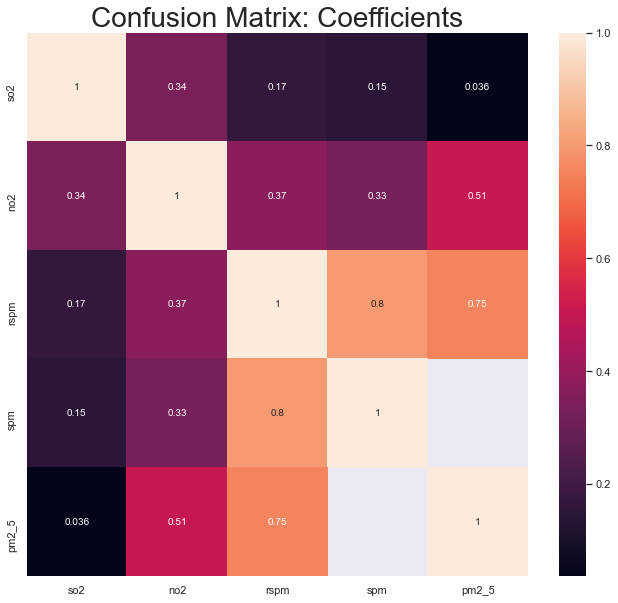

In [18]:
# Write your code here

plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True)
plt.title("Confusion Matrix: Coefficients", fontsize = 28)
plt.show()

## Exercise 6: Pairplot

In the block below, as a team using Seaborn, 
1. create a pairplot so we can look at all of the variables and how they correlate to each other graphically. 
1. note any feature pairs that appear to call for further investigation for having a linear pattern.

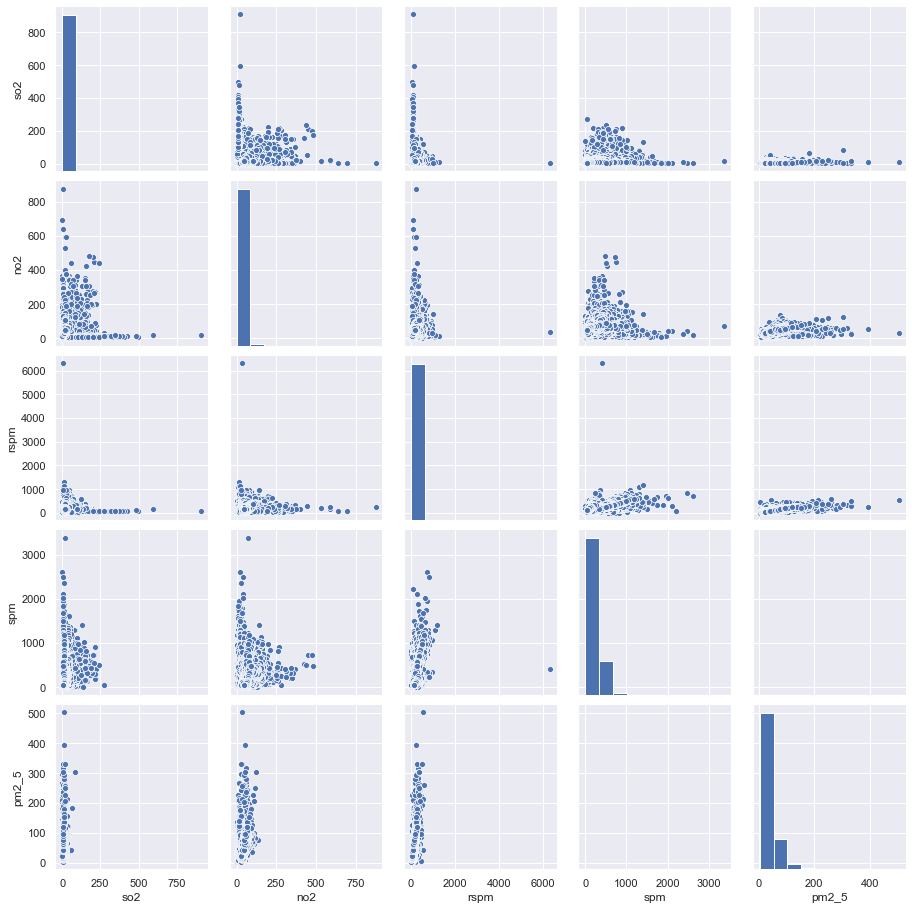

In [19]:
sns.pairplot(data=df)
plt.show()

In [20]:
%run lib/__eda_init__.py
%matplotlib inline

The time is  11:10:31 

😀 GOOD MORNING! 


 
 ____________________________________________________ 
 
 YOUR FORTUNE COOKIE THOUGHT FOR TODAY:  
 
 If I have to ask you for your attention, then you don't deserve mine. 
 
 ____________________________________________________ 
 

🧐 I am initiating the following for us: 
 

1.  Warnings: Off
2.  Pandas Initiated as pd
3.  Numpy Initiated as np
4.  Matplotlib.pyplot Initiated as plt
5.  Seaborn Initiated as sns. Style is set at 'darkgrid'.
6.  ggplot is having problems.
7.  Matplotlib Initiated as mpl. Matplotlib style set to "fivethirtyeight"
8.  tqdm Initiated
9.  Random Seed set at: 42
10. IPython Display Initiated
11. BeautifulSoup Initiated
12. Import csv Initiated
13. Import random Initiated 

14. Any other library that you will need for the functions will be initiated as you call for them.
___________________________________________ 
 
 🧐 The following functions are also ready: 


 eda(df) function ready for use. 
 	 The eda(df) func

# Functions

As you look at what you have done, can you imagine doing this repeatedly for every dataset that you encounter? If a sigh of despair doesn't emanate from you at the thought of this, congratulations! If one does, then let's use **Functions** to make our life easier. 

A **function** is a sub-routine (small program inside your regular program) which you define and give a name. Once you have done this, then anytime you pull up that given name, Python will run that sub-routine without you having to code all of the lines of code again. 

To start defining a function, we have to tell Python that a new function is being *defined*. In Python this is done with the `def` command. 

After we use the `def` command, we give the function a name for Python to learn, and we give the data that we are going to use, sorta. Let's look at an example. 

## Functions Example 1

We want to define a function that returns the square of whatever number we give it. And we want to call this function, "square". Look at the code below as we talk through it. (Yes, there are other ways to handle getting a square of a number in Python, but this is an illustrative example.)

In [21]:
# Defining a function that will give us the square of any number we put into it.

def square(number):
    sq = number * number
    return sq

Now that we have defined the square function for Python, every time we use this function after it has run Python will run this sub-routine (function). 

In the next block, as an example, we have a test_list of numbers. Up to now, if we wanted to find the square of each number in the list, we would write the following. 

In [22]:
test_list = [1, 2, 3, 4, 5]

for num in test_list:
    number = num * num
    print(number)

1
4
9
16
25


However, now that you have defined a function to find the square, this is how we would right the code for finding the square of each number in a list now. 

In [23]:
test_list = [1, 2, 3, 4, 5]

for num in test_list:
    print(square(num))

1
4
9
16
25


Notice the difference in the code snippets. While our example is quite small and simple, we have reduced two lines of code down to one. If whatever program we now write requires us to do this multiple times, the savings in lines of code begin to multiply. 

A function can do anything that any other Python programming code can do. It just does it in one line of code rather than several. 

## Example 2

Let's move on to another example that is a bit larger just to illustrate the power of functions. 

In this example I want to:
1. generate any amount of random numbers (*n*)
1. they are to start with a number I give Python (*start*)
1. they are to finish with a number I give Python (*finish*)
1. AND they are to return all of the even random numbers generated as a list

In [24]:
def random_even_numbers(n, start, finish):
    import random
    test_list = []
    for _ in range(n):
        a = random.randint(start, finish)
        if (a % 2) == 0:
            test_list.append(a)
    return test_list

In [25]:
print(random_even_numbers(50,1,250))

[34, 146, 200, 152, 12, 248, 174, 236, 168, 216, 174, 194, 220, 218, 248, 134, 62, 166, 238, 32, 168, 192, 124]


Now, anytime we want to generate a group of random even numbers, we simply have to use the name of the function. 

And do the numbers still come out as a list?

Let's find out!

In [26]:
type(random_even_numbers(50, 1, 250))

list

Now let's complicate the function further. 

We want to do all of the same things as in our last example, but rather than one list of even numbers, we want the function to return two lists, one of even numbers only and the second of odd numbers only. 

In [27]:
def random_sorted_numbers(n, start, finish):
    import random
    even_list = []
    odd_list = []
    for _ in range(n):
        a = random.randint(start, finish)
        if (a % 2) == 0:
            even_list.append(a)
        else:
            odd_list.append(a)
    return even_list, odd_list

In [28]:
even, odd = random_sorted_numbers(12, 1, 250)

print('Even_list:', even)
print('Even_list count:', len(even))
print('Odd_list:', odd)
print('Odd_list count:', len(odd))

Even_list: [6, 64, 6, 118, 136, 30, 88, 204]
Even_list count: 8
Odd_list: [127, 3, 235, 141]
Odd_list count: 4


## Example 3: How to use these to our advantage

In [29]:
%run lib/simple_eda.py #calls forward a .py file and runs it
%matplotlib inline

In [30]:
simple_eda(df)

DataFrame Shape:
 (435742, 9) 




'DataFrame Head:'

,0,1,2,3,4
state,Andhra Pradesh,Andhra Pradesh,Andhra Pradesh,Andhra Pradesh,Andhra Pradesh
location,Hyderabad,Hyderabad,Hyderabad,Hyderabad,Hyderabad
type,RRO,Industrial,RRO,RRO,Industrial
so2,4.8,3.1,6.2,6.3,4.7
no2,17.4,7,28.5,14.7,7.5
rspm,NaN,NaN,NaN,NaN,NaN
spm,NaN,NaN,NaN,NaN,NaN
pm2_5,NaN,NaN,NaN,NaN,NaN
date,1990-02-01 00:00:00,1990-02-01 00:00:00,1990-02-01 00:00:00,1990-03-01 00:00:00,1990-03-01 00:00:00




DataFrame Statistical Description:
                  so2            no2           rspm            spm        pm2_5
count  401096.000000  419509.000000  395520.000000  198355.000000  9314.000000
mean       10.829414      25.809623     108.832784     220.783480    40.791467
std        11.177187      18.503086      74.872430     151.395457    30.832525
min         0.000000       0.000000       0.000000       0.000000     3.000000
25%         5.000000      14.000000      56.000000     111.000000    24.000000
50%         8.000000      22.000000      90.000000     187.000000    32.000000
75%        13.700000      32.200000     142.000000     296.000000    46.000000
max       909.000000     876.000000    6307.033333    3380.000000   504.000000 


DataFrame Column Types:
 state               object
location            object
type                object
so2                float64
no2                float64
rspm               float64
spm                float64
pm2_5              float64
date   

## Exercise 7: EDA Function

Now that we have covered functions briefly, let's do a two part exercise. 

### Part 1

In the next block, write out a function that we will call, `eda`. Write the function so that it does all of the work of the preliminary EDA for a dataset.

1. Provides the DataFrame shape
1. Provides the DataFrame's head
1. Provides the DataFrame's info
1. Provides the DataFrame's statistical description
1. Provides the DataFrame's column names and variable type
1. Provides the DataFrame's value count for each column
1. Provides the DataFrame's null value count by column
1. Separates the DataFrame's columns into a numeric columns list and a categorical columns list

Once you have a single function to do this, run it to test it. When you are satisfied with what you have done, let me know.

In [31]:
#Write your Code here
def eda(df):
    print('DataFrame Shape:\n', df.shape, '\n\n')
    display('DataFrame Head:', df.head())
    print('\n\nDataFrame Statistical Description:\n', df.describe(), '\n\n')
    print('DataFrame Column Types:\n', df.dtypes,'\n\n')
    print('\nDataFrame count: ', '\n', df.count())
    print('\n\nDataFrame Null Value Count:\n', df.isnull().sum())
    print('\n\nNumber of Duplicated Rows:\n', df.duplicated().sum())
    



In [32]:
import pandas as pd

my_data = pd.read_csv('data/data.csv', index_col=0)

eda(my_data)

DataFrame Shape:
 (435742, 12) 




'DataFrame Head:'

,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
stn_code,,,,,,,,,,,,
150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/90
151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/90
152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/90
150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/90
151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/90




DataFrame Statistical Description:
                  so2            no2           rspm            spm        pm2_5
count  401096.000000  419509.000000  395520.000000  198355.000000  9314.000000
mean       10.829414      25.809623     108.832784     220.783480    40.791467
std        11.177187      18.503086      74.872430     151.395457    30.832525
min         0.000000       0.000000       0.000000       0.000000     3.000000
25%         5.000000      14.000000      56.000000     111.000000    24.000000
50%         8.000000      22.000000      90.000000     187.000000    32.000000
75%        13.700000      32.200000     142.000000     296.000000    46.000000
max       909.000000     876.000000    6307.033333    3380.000000   504.000000 


DataFrame Column Types:
 sampling_date                   object
state                           object
location                        object
agency                          object
type                            object
so2                         

---


### Part 2

Now let's see how to make this the first of your own library of functions for conducting an EDA in the future. 

In [34]:
%run lib/__eda_init__.py

The time is  11:25:27 

😀 GOOD MORNING! 


 
 ____________________________________________________ 
 
 YOUR FORTUNE COOKIE THOUGHT FOR TODAY:  
 
 Trying to define yourself is like tyrying to bite your own teeth. 
 
 ____________________________________________________ 
 

🧐 I am initiating the following for us: 
 

1.  Warnings: Off
2.  Pandas Initiated as pd
3.  Numpy Initiated as np
4.  Matplotlib.pyplot Initiated as plt
5.  Seaborn Initiated as sns. Style is set at 'darkgrid'.
6.  ggplot is having problems.
7.  Matplotlib Initiated as mpl. Matplotlib style set to "fivethirtyeight"
8.  tqdm Initiated
9.  Random Seed set at: 42
10. IPython Display Initiated
11. BeautifulSoup Initiated
12. Import csv Initiated
13. Import random Initiated 

14. Any other library that you will need for the functions will be initiated as you call for them.
___________________________________________ 
 
 🧐 The following functions are also ready: 


 eda(df) function ready for use. 
 	 The eda(df) function

In [35]:
%matplotlib inline

In [36]:
eda(df)


 df total missing values percentage:  
 19.387593780009478
_______________________________________________


'df Head: '

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,NaN,NaN,NaN,1990-03-01


_______________________________________________
observations (rows):  435742 
 features (columns):  9
_______________________________________________

 df keys:  
 Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')
_______________________________________________


'df describe: '

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


_______________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
state       435742 non-null object
location    435739 non-null object
type        430349 non-null object
so2         401096 non-null float64
no2         419509 non-null float64
rspm        395520 non-null float64
spm         198355 non-null float64
pm2_5       9314 non-null float64
date        435735 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 29.9+ MB

 df info:  
 None
_______________________________________________

 df types:  
 state               object
location            object
type                object
so2                float64
no2                float64
rspm               float64
spm                float64
pm2_5              float64
date        datetime64[ns]
dtype: object
_______________________________________________

 df count:  
 state       435742
location    435739
type

In [37]:
break_down_features(df)

There are  5  numeric columns and  4 categorical columns in this dataset.


(['so2', 'no2', 'rspm', 'spm', 'pm2_5'], ['state', 'location', 'type', 'date'])

In [38]:
# !pip install pandas-profiling

In [ ]:
pandas_profiling(df)

Your dataset is 435742 entries long, which is pretty big.
Do you wish to continue? [y or n]y
Go get a coffee and visit someone while I process this. 

